### Data Mining Mini-Project :
#### Réalisé par : 
    Ayman Bouchareb, Amr El Khassal, Taha Metougui
##### Objectif :
    The Objectif of this Exercice is to create a model that predicts the income attribute of an input record , we have a two (2) sets of data :
##### Training Set (train.csv) : 
        this file (set) will be used to train our model 
##### Testing Set (test.csv) :
        this file (set) will be used to benchmark our model 

1. We start by Importing the necessary Packages into the envirement :

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import scipy as sc

2. We Import our datasets :

2.1 We write the code to import our datasets

In [2]:
testsUri, trainUri = "test.csv", "train.csv"
testsraw, trainraw = pd.read_csv(testsUri), pd.read_csv(trainUri)
tests_dataset = testsraw.copy()
train_dataset = trainraw.copy()

2.2.1 We Test the success of the operation by prining the first 10 rows of each set :

In [3]:
tests_dataset.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [4]:
train_dataset.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


2.2.2 We Extract the value set of each Attribute :

In [5]:
field_space_map = dict([(attribute, set([record[attribute] for (_,record) in train_dataset.iterrows()])) for attribute in train_dataset if attribute not in ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt', 'native-country']])
pd.DataFrame.from_dict(field_space_map, orient="index")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
workclass,Local-gov,Self-emp-inc,Without-pay,State-gov,Never-worked,Self-emp-not-inc,Private,?,Federal-gov,None,None,None,None,None,None,None
education,7th-8th,Assoc-acdm,10th,5th-6th,9th,Doctorate,Some-college,1st-4th,11th,HS-grad,Prof-school,Assoc-voc,Bachelors,Masters,12th,Preschool
educational-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
marital-status,Married-spouse-absent,Never-married,Separated,Married-AF-spouse,Widowed,Divorced,Married-civ-spouse,None,None,None,None,None,None,None,None,None
occupation,Tech-support,?,Other-service,Craft-repair,Armed-Forces,Protective-serv,Prof-specialty,Machine-op-inspct,Transport-moving,Farming-fishing,Adm-clerical,Priv-house-serv,Exec-managerial,Handlers-cleaners,Sales,None
relationship,Husband,Unmarried,Own-child,Other-relative,Wife,Not-in-family,None,None,None,None,None,None,None,None,None,None
race,Asian-Pac-Islander,Other,Amer-Indian-Eskimo,White,Black,None,None,None,None,None,None,None,None,None,None,None
gender,Male,Female,None,None,None,None,None,None,None,None,None,None,None,None,None,None
income,>50K,<=50K,None,None,None,None,None,None,None,None,None,None,None,None,None,None


2.3.1 We show the training set description : 

In [6]:
train_dataset.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


2.3.2 We show the tessting set description : 

In [7]:
tests_dataset.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,16281.000000,16281,1.628100e+04,16281,16281.000000,16281,16281,16281,16281,16281,16281.000000,16281.000000,16281.000000,16281,16281
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K.
freq,NaN,11210,NaN,5283,NaN,7403,2032,6523,13946,10860,NaN,NaN,NaN,14662,12435
mean,38.767459,NaN,1.894357e+05,NaN,10.072907,NaN,NaN,NaN,NaN,NaN,1081.905104,87.899269,40.392236,NaN,NaN
std,13.849187,NaN,1.057149e+05,NaN,2.567545,NaN,NaN,NaN,NaN,NaN,7583.935968,403.105286,12.479332,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.167360e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778310e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.383840e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


2.4.1 We show the Records and Dimensions Count of each set :

In [8]:
testscount, testsdimcount = tests_dataset.shape
traincount, traindimcount = train_dataset.shape
data = [["training Set", traincount, traindimcount], ["testing Set",testscount, testsdimcount]]
pd.DataFrame(data, columns=["","Records Count", "Dimensions Count"])


,,Records Count,Dimensions Count
0,training Set,32561,15
1,testing Set,16281,15


2.4.2 Class distribution :

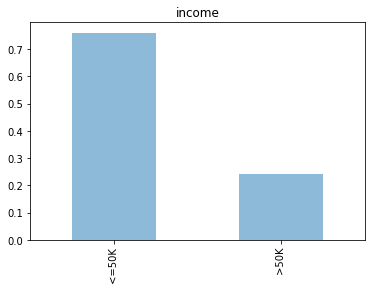

In [9]:
train_dataset.income.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('income')
plt.show()

2.5.1 We study the corelation between the attribute: 
we transform the non-numerique values into some numerique values using scipy

In [10]:
from sklearn.preprocessing import LabelEncoder
def transform_label_2_num(df, atts):
    enc = LabelEncoder()
    for att in atts:
        enc.fit(df[att])
        df[att] = enc.transform(df[att])
    return df

In [11]:
corr = transform_label_2_num(train_dataset, [i for i in train_dataset if i not in ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt', 'native-country']])
corr.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.079317
educational-num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.335154
marital-status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.071846
gender,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.215980


<AxesSubplot:>

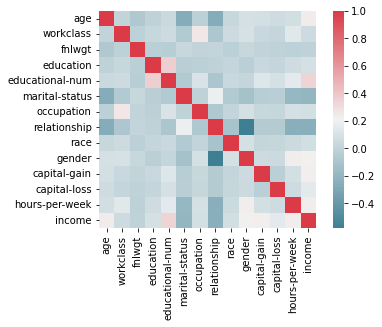

In [12]:
corr = corr.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

2.6 Diagrams : 

In [13]:
encoded_dataset = train_dataset.copy()
train_dataset = trainraw.copy()
cat_portion = train_dataset.select_dtypes(include=['object'])
print('Number of categorical variables : ',len(cat_portion.columns))

num_portion = train_dataset[[c for c in train_dataset if c not in cat_portion.columns]]
print('Number of numerical variables : ',len(num_portion.columns))

Number of categorical variables :  9
Number of numerical variables :  6


2.6.1 Attribute Distributions

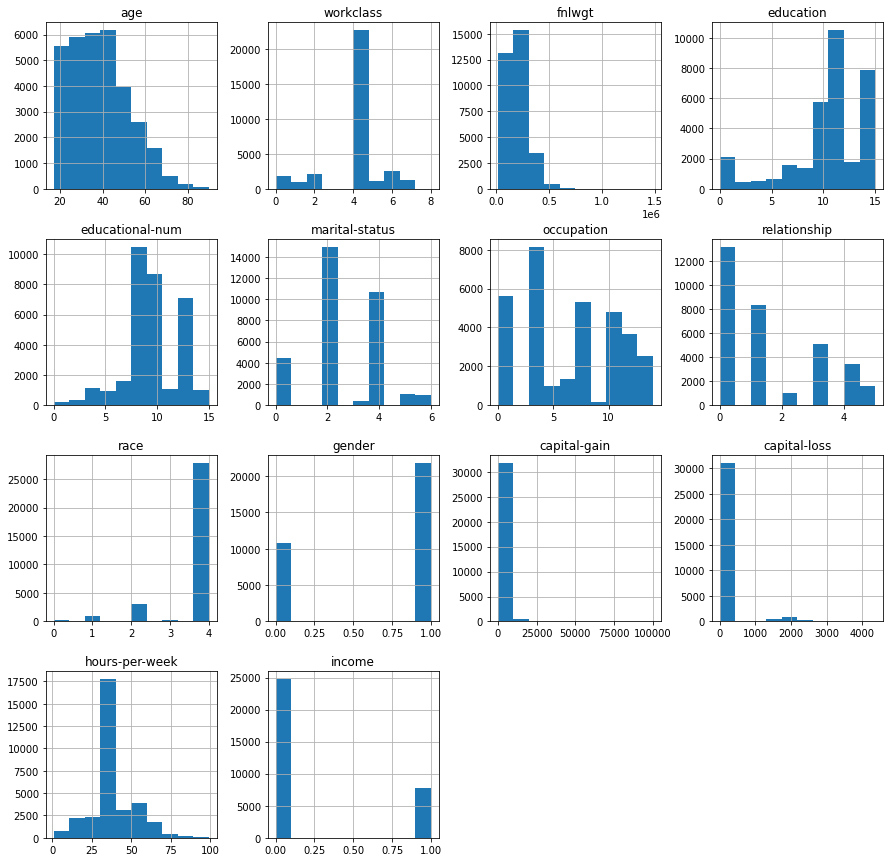

In [14]:
encoded_dataset.hist(figsize=(15,15))
plt.show()

2.6.2 numerical attributes distribution :

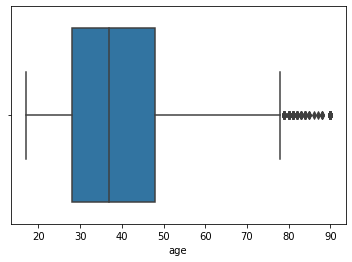

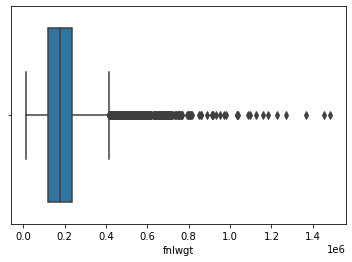

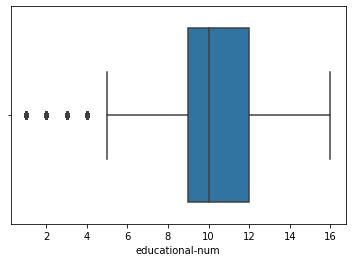

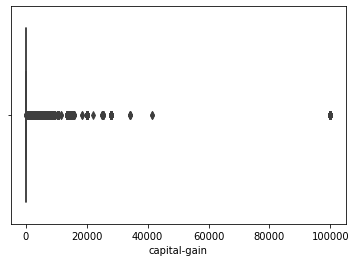

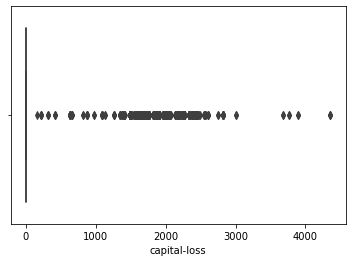

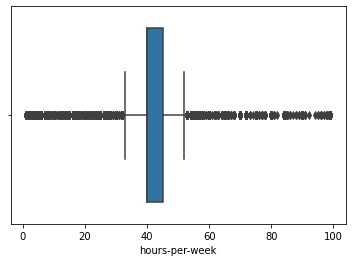

In [15]:
for i, col in enumerate(num_portion):
    plt.figure(i)
    sns.boxplot(x=num_portion[col])

2.6.3 Categorical Attributes Distribution with Income:

Chart of workclass with regards to income


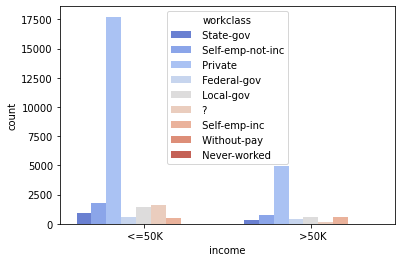

Chart of education with regards to income


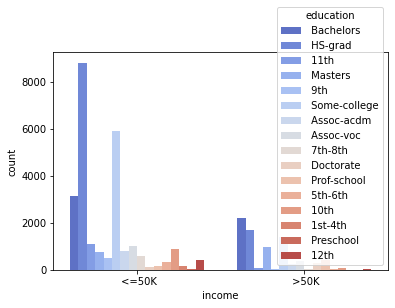

Chart of marital-status with regards to income


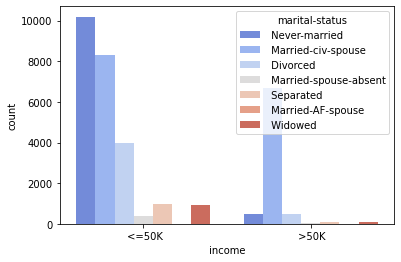

Chart of occupation with regards to income


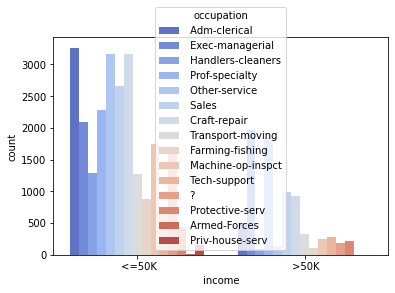

Chart of relationship with regards to income


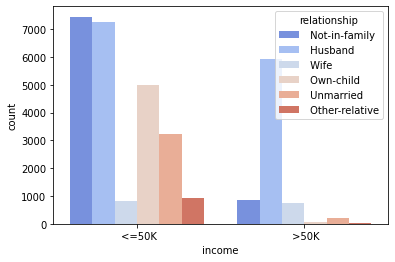

Chart of race with regards to income


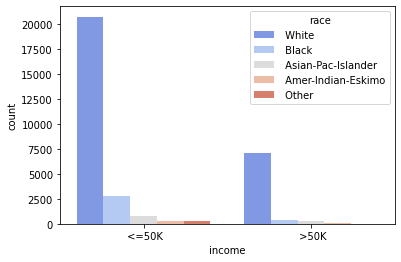

Chart of gender with regards to income


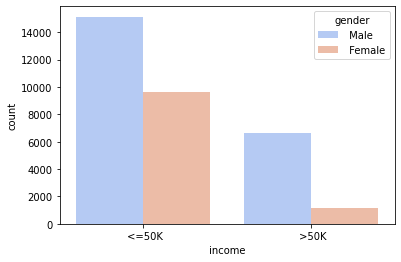

In [16]:
for i, col in enumerate(cat_portion):
    if col not in ["income", "native-country"]:
        print(f"Chart of {col} with regards to income")
        plt.figure(i)
        sns.countplot(x = cat_portion['income'], palette='coolwarm', hue=col, data=cat_portion)
        plt.show()

3 Data Engineering :

3.1 Fixing the missing Data :

3.1.1 Detecting Missing Data :

Missing Value by attribute


<AxesSubplot:>

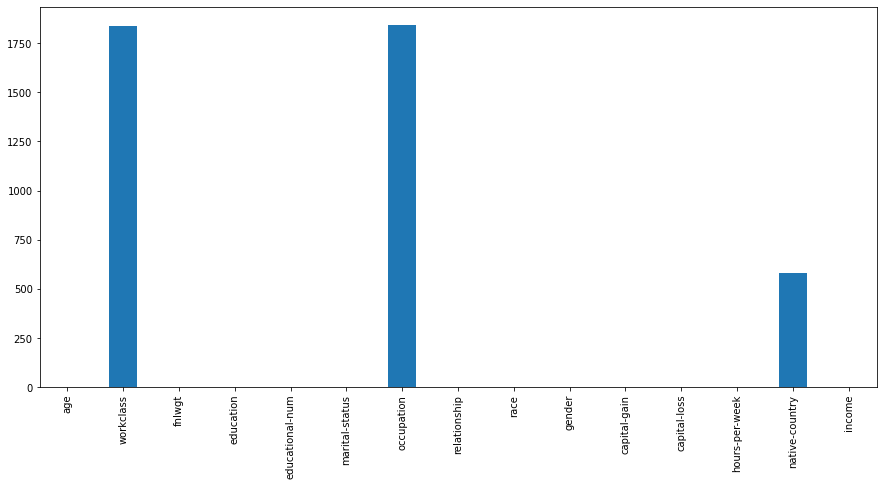

In [17]:
print("Missing Value by attribute")
tests_dataset.isin([' ?']).sum().plot(kind='bar', figsize=(15,7))
train_dataset.isin([' ?']).sum().plot(kind='bar', figsize=(15,7))

3.1.2 Fixing Missing Data :

In [18]:
train_dataset.loc[train_dataset['occupation']==' ?','occupation'] = train_dataset['occupation'].value_counts().idxmax()
train_dataset.loc[train_dataset['workclass']==' ?','workclass'] = train_dataset['workclass'].value_counts().idxmax()
train_dataset.loc[train_dataset['native-country']==' ?','native-country'] = train_dataset['native-country'].value_counts().idxmax()
tests_dataset.loc[train_dataset['occupation']==' ?','occupation'] = train_dataset['occupation'].value_counts().idxmax()
tests_dataset.loc[train_dataset['workclass']==' ?','workclass'] = train_dataset['workclass'].value_counts().idxmax()
tests_dataset.loc[train_dataset['native-country']==' ?','native-country'] = train_dataset['native-country'].value_counts().idxmax()

Missing Value by attribute


<AxesSubplot:>

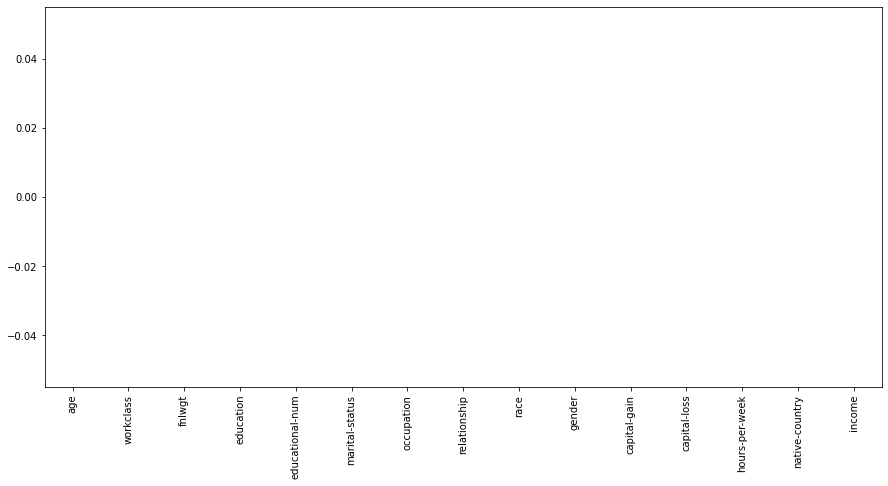

In [19]:
print("Missing Value by attribute")
train_dataset.isin([' ?']).sum().plot(kind='bar', figsize=(15,7))

3.1.3 Fixing Outliers :

the ``returnNonOutilier`` allows us to chose whether we return the values faulted or the values we want to keep, will come in handy when filtering the dataset itself later.

In [20]:
def Extract_Outiliers(df, features, returnNonOutilier = False):   
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    if returnNonOutilier :
        return df[((df[features] < (Q1 - 1.5 * IQR)) |(df[features] > (Q3 + 1.5 * IQR))).sum(axis=1) <= 2]        
    else :
        return df[((df[features] < (Q1 - 1.5 * IQR)) |(df[features] > (Q3 + 1.5 * IQR))).sum(axis=1) > 2]

In [21]:
outliers = Extract_Outiliers(train_dataset, num_portion.columns, returnNonOutilier = False)
outliers

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,<=50K
405,41,Private,445382,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,65,United-States,>50K
1034,76,Private,431192,7th-8th,4,Widowed,Prof-specialty,Not-in-family,White,Male,0,0,2,United-States,<=50K
1291,63,Self-emp-not-inc,795830,1st-4th,2,Widowed,Other-service,Unmarried,White,Female,0,0,30,El-Salvador,<=50K
1808,73,Local-gov,232871,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2228,0,10,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30558,61,Private,229744,1st-4th,2,Married-civ-spouse,Prof-specialty,Husband,White,Male,3942,0,20,Mexico,<=50K
30948,41,Private,433989,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,4386,0,60,United-States,>50K
31814,80,Self-emp-not-inc,26865,7th-8th,4,Never-married,Farming-fishing,Unmarried,White,Male,0,0,20,United-States,<=50K
32035,40,Private,566537,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,<=50K


Since we have  : 

In [22]:
print("Lenght of Outliers Set is :", len(outliers)) 
print("Lenght of Date Set is :", len(train_dataset)) 
print("Precent of Outliers in Dataset :", len(outliers) / len(train_dataset)) 

Lenght of Outliers Set is : 95
Lenght of Date Set is : 32561
Precent of Outliers in Dataset : 0.0029176008107859096


since Outliers % is far below the 1% it's safe to just discard them

In [23]:
train_dataset = Extract_Outiliers(train_dataset, num_portion.columns, returnNonOutilier = True)
tests_dataset = Extract_Outiliers(tests_dataset, num_portion.columns, returnNonOutilier = True)
train_dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


3.2 Encoding Categorical Values as Numbers :

In [24]:
train_dataset = transform_label_2_num(train_dataset, [i for i in train_dataset if i in cat_portion.columns])
tests_dataset = transform_label_2_num(tests_dataset, [i for i in tests_dataset if i in cat_portion.columns])
train_dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


3.3 removing Unecessary Fields :

3.3.1 Studying the Correclation Matrix

<AxesSubplot:>

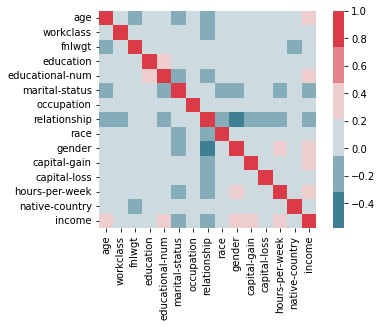

In [25]:
sns.heatmap(train_dataset.corr(), cmap=sns.diverging_palette(220, 10), square=True)

from the correlation heat-map we can deduce that the the most important fields in regards to income are :</br>
        #### age, educational-num, gender; capital-gain, hours-per-week</br>
from the correlation heat-map we can deduce that the the least important fields in regards to income are :</br>
        #### marital-status, relationship
       

so we are gonna drop the least important fields :

In [26]:
for att in ["marital-status", "relationship", "fnlwgt"]:
    train_dataset = train_dataset.drop([att], axis=1)
    tests_dataset = tests_dataset.drop([att], axis=1)

In [27]:
train_dataset

,age,workclass,education,educational-num,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,0,4,1,2174,0,40,38,0
1,50,5,9,13,3,4,1,0,0,13,38,0
2,38,3,11,9,5,4,1,0,0,40,38,0
3,53,3,1,7,5,2,1,0,0,40,38,0
4,28,3,9,13,9,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,7,12,12,4,0,0,0,38,38,0
32557,40,3,11,9,6,4,1,0,0,40,38,1
32558,58,3,11,9,0,4,0,0,0,40,38,0
32559,22,3,11,9,0,4,1,0,0,20,38,0


4. Classification Part :

In [28]:
from sklearn.model_selection import train_test_split, StratifiedKFold,  cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

4.1 Separation Of Dataset into Training set and validation set :

In [29]:
train, test = train_test_split(train_dataset, test_size = 0.25)
print(f'Train Shape : {train.shape} , Test Shape : {test.shape}')

Train Shape : (24349, 12) , Test Shape : (8117, 12)


In [30]:
features = train_dataset.columns
features.drop('income')
xtrain, ytrain = train[features].drop(['income'], axis=1), train.income
xtest, ytest = test[features].drop(['income'], axis=1), test.income

In [31]:
xtrain.head(5)

,age,workclass,education,educational-num,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
15095,52,3,11,9,3,4,1,0,0,55,38
3494,25,3,9,13,3,4,0,0,0,40,38
23534,17,3,1,7,2,4,1,0,0,30,38
30685,42,5,1,7,7,4,0,0,0,30,38
11512,90,3,11,9,7,4,0,0,0,24,38


4.2 Learning Part

In [46]:
kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(("KNeighborsClassifier", KNeighborsClassifier()))
classifiers.append(("DecisionTreeClassifier", DecisionTreeClassifier(random_state=random_state)))
classifiers.append(("RandomForestClassifier", RandomForestClassifier(random_state=random_state)))

cv_results = []
for _, classifier in classifiers :
    cv_results.append(cross_val_score(classifier, xtrain, y = ytrain, scoring = "accuracy", cv = kfold, n_jobs=4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["KNeighbors", "DecisionTree",
"RandomForest"]})

In [47]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.827673,0.004910,KNeighbors
1,0.795967,0.006780,DecisionTree
2,0.826687,0.004196,RandomForest


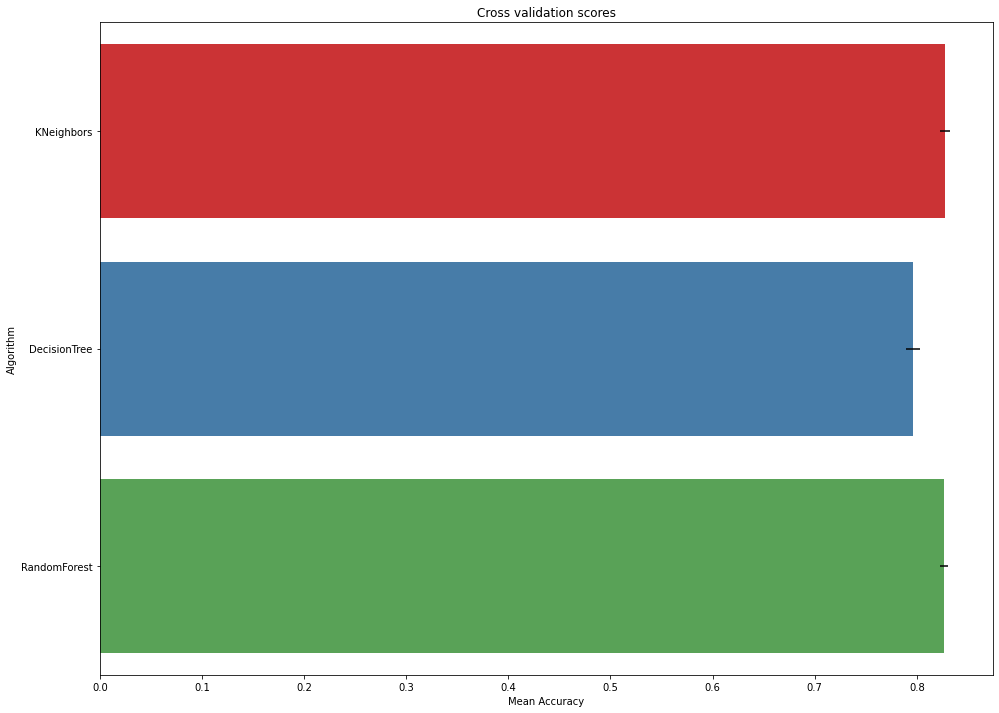

In [48]:
plt.figure(figsize=(16,12))
g = sns.barplot(x ="CrossValMeans",y ="Algorithm",data = cv_res, palette="Set1",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
plt.show()

In [64]:
Accuracies = []
for name, model in classifiers :
    model.fit(xtrain, ytrain)
    predictions = model.predict(xtest)
    Accuracies.append((name, accuracy_score(ytest,predictions), model))
name, _, Chosen = max(Accuracies, key=lambda x: x[1])
print("The Model Chosed based on accuracy is ", name)

The Model Chosed based on accuracy is  RandomForestClassifier


5. We Apply the chosen Models on the trainSet inside train.csv :

In [50]:
Y = tests_dataset.income
X = tests_dataset.drop(['income'], axis=1)

In [66]:
Chosen.fit(xtrain, ytrain)
predictions = Chosen.predict(X)

5.2 We print classification_report for the Model : 

In [67]:

print(name, "classification_report")
print(classification_report(Y, predictions))

RandomForestClassifier classification_report
              precision    recall  f1-score   support

           0       0.85      0.92      0.89     12388
           1       0.66      0.48      0.56      3833

    accuracy                           0.82     16221
   macro avg       0.75      0.70      0.72     16221
weighted avg       0.81      0.82      0.81     16221



5.3 we print the confusion matrix of the model

In [76]:
cfmatrix = confusion_matrix(Y, predictions)
print("confusion matrix of the predictions\n", cfmatrix)

confusion matrix of the predictions
 [[11425   963]
 [ 1985  1848]]


5.4 we print the accuracy score of the model

In [74]:
accscore = accuracy_score(Y, predictions)
print("accuracy score of the predictions", accscore)

accuracy score of the predictions 0.8182602798841009
